In [1]:
# Imports
import json
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Constants
NSHARDS = 10
RESULTS_DIR = '../../graph_gen/snellius_gen/nodeclassification/sbm'
LOCALDIR = '/tmp'

MODELS = ['GCN', 'MLP']
METRIC = 'accuracy_score'

In [41]:
def df_gen(RESULTS_DIR, NSHARDS):  
  dfs = []
  for shard_idx in range(NSHARDS):
    filename = 'results.ndjson-%s-of-%s' % (str(shard_idx).zfill(5), str(NSHARDS).zfill(5))
    print(filename)

    with open(f'{RESULTS_DIR}/{filename}', 'r') as f:
      lines = f.readlines()
      records = map(json.loads, lines)
      dfs.append(pd.DataFrame.from_records(records))

  # Construct df and remove nans
  results_df = pd.concat(dfs)
  results_df.drop(['marginal_param', 'fixed_params'], axis=1, inplace=True)
  results_df.dropna(axis=0, inplace=True)
  del dfs
  return results_df

In [47]:
results_df = df_gen(RESULTS_DIR, NSHARDS)

results.ndjson-00000-of-00010
results.ndjson-00001-of-00010
results.ndjson-00002-of-00010
results.ndjson-00003-of-00010
results.ndjson-00004-of-00010
results.ndjson-00005-of-00010
results.ndjson-00006-of-00010
results.ndjson-00007-of-00010
results.ndjson-00008-of-00010
results.ndjson-00009-of-00010


In [48]:
results_df

,nvertex,avg_degree,feature_center_distance,feature_dim,edge_center_distance,edge_feature_dim,p_to_q_ratio,num_clusters,cluster_size_slope,power_exponent,...,MLP__test_logloss,MLP__model_dropout,MLP__model_hidden_channels,MLP__model_in_channels,MLP__model_lr,MLP__model_num_layers,MLP__model_weight_decay,MLP__model_out_channels,MLP__train_epochs,MLP__train_patience
0,3500,22.516371,0.743168,16,2.0,2,13.780719,6,0.166640,0.609365,...,1.816169,0.410143,4,16,0.067781,2,0.000715,6,200,50
1,3870,4.707113,1.281858,16,2.0,2,4.747722,3,0.417793,0.576091,...,1.053938,0.041640,4,16,0.163860,2,0.000561,3,200,50
2,1529,13.209503,2.488823,16,2.0,2,13.680214,7,0.618203,0.848904,...,1.869850,0.514995,4,16,0.199666,3,0.001040,7,200,50
3,1150,25.314487,4.045995,16,2.0,2,8.973072,9,0.733547,0.335753,...,2.196904,0.338887,4,16,0.079656,4,0.000116,9,200,50
4,3766,20.363789,0.039044,16,2.0,2,1.762130,5,0.496456,0.339420,...,1.658715,0.290633,2,16,0.114743,3,0.000751,5,200,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,4025,18.806047,3.359119,16,2.0,2,9.521151,8,0.637943,0.321947,...,1.994525,0.183168,2,16,0.050663,3,0.000542,8,200,50
46,3294,24.309851,0.545010,16,2.0,2,8.517829,8,0.254754,0.260363,...,1.959756,0.081875,2,16,0.084722,2,0.000364,8,200,50
47,2311,8.268002,1.590396,16,2.0,2,10.782956,5,0.471349,0.268160,...,1.484676,0.440813,8,16,0.034952,4,0.000399,5,200,50
48,1448,18.181818,4.396534,16,2.0,2,8.494741,4,0.735249,0.364577,...,1.398012,0.480822,2,16,0.088273,2,0.000835,4,200,50


In [18]:
results_df.columns

Index(['nvertex', 'avg_degree', 'feature_center_distance', 'feature_dim',
       'edge_center_distance', 'edge_feature_dim', 'p_to_q_ratio',
       'num_clusters', 'cluster_size_slope', 'power_exponent', 'min_deg',
       'generator_name', 'num_nodes', 'num_edges', 'edge_density',
       'degree_gini', 'approximate_diameter', 'coreness_eq_1',
       'coreness_geq_2', 'coreness_geq_5', 'coreness_geq_10', 'coreness_gini',
       'avg_cc', 'transitivity', 'num_triangles', 'cc_size',
       'power_law_estimate', 'edge_homogeneity',
       'avg_in_feature_angular_distance', 'avg_out_feature_angular_distance',
       'feature_angular_snr', 'pareto_exponent', 'avg_degree_est',
       'community_size_simpsons', 'p_to_q_ratio_est', 'p_to_q_ratio__est_dc',
       'skipped', 'sample_id', 'GCN__val_accuracy', 'GCN__val_f1_micro',
       'GCN__val_f1_macro', 'GCN__val_rocauc_ovr', 'GCN__val_rocauc_ovo',
       'GCN__val_logloss', 'GCN__test_accuracy', 'GCN__test_f1_micro',
       'GCN__test_f1_macr

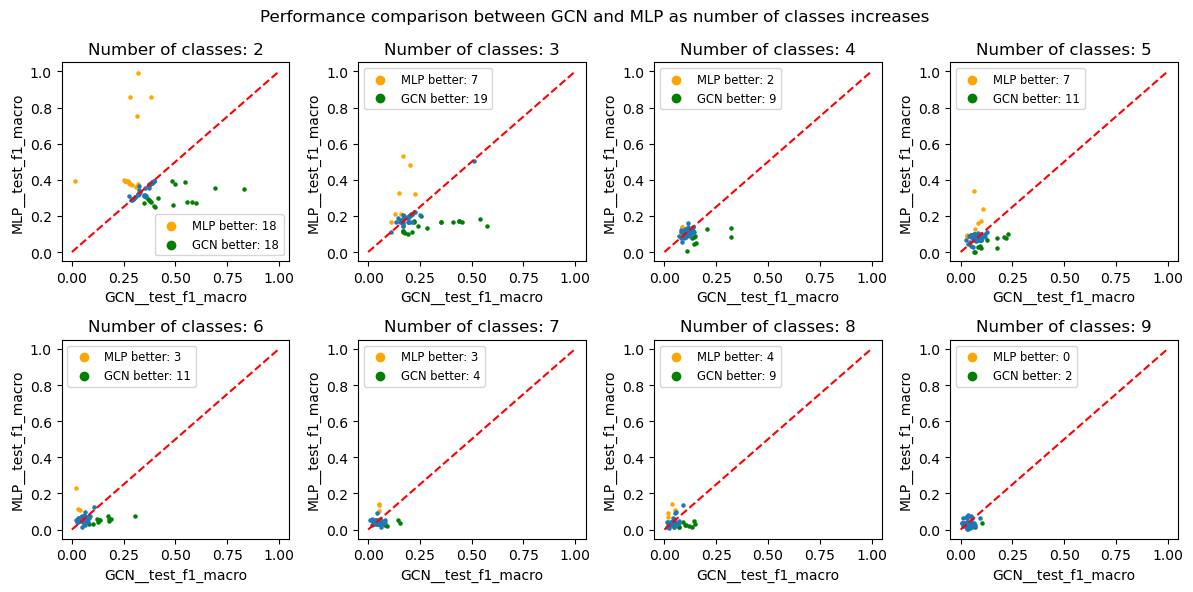

In [22]:
MLP_METRIC = 'MLP__test_f1_macro'
GCN_METRIC = 'GCN__test_f1_macro'
cluster_sizes = results_df['num_clusters'].unique()
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.flatten()
for cluster_size in np.sort(cluster_sizes):
    axes_index = cluster_size - cluster_sizes.min()
    results_df_2_clusters = results_df[results_df['num_clusters'] == cluster_size]
    MLP_better = results_df_2_clusters[MLP_METRIC] > results_df_2_clusters[GCN_METRIC]+.05
    GCN_better = results_df_2_clusters[GCN_METRIC] > results_df_2_clusters[MLP_METRIC]+.05
    total_samples = len(MLP_better)

    ax = axes[axes_index]
    ax.scatter(results_df_2_clusters[GCN_METRIC][MLP_better],
               results_df_2_clusters[MLP_METRIC][MLP_better], color = 'orange', s = 5)
    ax.scatter(results_df_2_clusters[GCN_METRIC][GCN_better],
               results_df_2_clusters[MLP_METRIC][GCN_better], color = 'green', s = 5)
    ax.scatter(results_df_2_clusters[GCN_METRIC][~(MLP_better | GCN_better)],
               results_df_2_clusters[MLP_METRIC][~(MLP_better | GCN_better)], s = 5)
    ax.plot([0, 1], [0, 1], color='red', linestyle='--')
    ax.scatter([], [], label=f"MLP better: {sum(MLP_better)}", color = 'orange')
    ax.scatter([], [], label=f"GCN better: {sum(GCN_better)}", color = 'green')
    ax.set_title(f'Number of classes: {cluster_size}')
    ax.set_xlabel(f'{GCN_METRIC}')
    ax.set_ylabel(f'{MLP_METRIC}')
    ax.legend(fontsize='small')

# Hide unused subplots if cluster_sizes < 8
for i in range(len(cluster_sizes), len(axes)):
    axes[i].axis('off')

plt.suptitle("Performance comparison between GCN and MLP as number of classes increases")
plt.tight_layout()
plt.show()


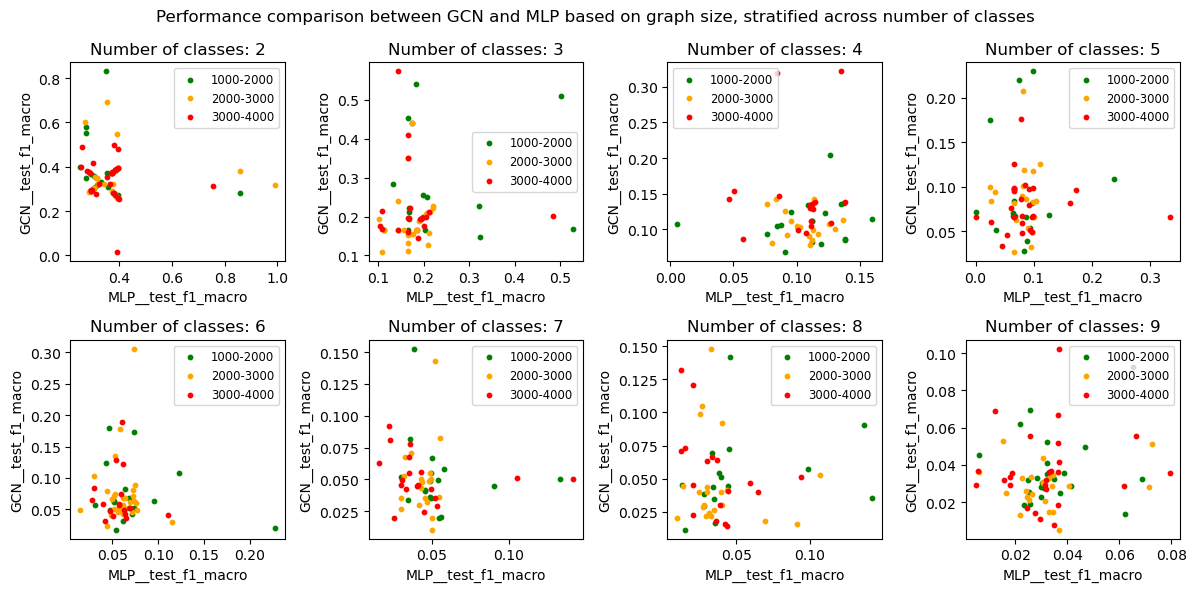

In [24]:
MLP_METRIC = 'MLP__test_f1_macro'
GCN_METRIC = 'GCN__test_f1_macro'
cluster_sizes = results_df['num_clusters'].unique()
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.flatten()
for cluster_size in np.sort(cluster_sizes):
    axes_index = cluster_size - cluster_sizes.min()
    results_df_2_clusters = results_df[results_df['num_clusters'] == cluster_size]
    small_mask = results_df_2_clusters['nvertex'] < 2000
    mid_mask = (results_df_2_clusters['nvertex'] >= 2000) & (results_df_2_clusters['nvertex'] < 3000)
    large_mask = results_df_2_clusters['nvertex'] >= 3000
    ax = axes[axes_index]
    ax.scatter(results_df_2_clusters[MLP_METRIC][small_mask], results_df_2_clusters[GCN_METRIC][small_mask], s=10, color = 'green', label = '1000-2000')
    ax.scatter(results_df_2_clusters[MLP_METRIC][mid_mask], results_df_2_clusters[GCN_METRIC][mid_mask], s=10, color = 'orange', label = '2000-3000')    
    ax.scatter(results_df_2_clusters[MLP_METRIC][large_mask], results_df_2_clusters[GCN_METRIC][large_mask], s=10, color = 'red', label = '3000-4000')
    ax.set_title(f'Number of classes: {cluster_size}')
    ax.set_xlabel(f'{MLP_METRIC}')
    ax.set_ylabel(f'{GCN_METRIC}')
    ax.legend(fontsize='small')

# Hide unused subplots if cluster_sizes < 8
for i in range(len(cluster_sizes), len(axes)):
    axes[i].axis('off')

plt.suptitle("Performance comparison between GCN and MLP based on graph size, stratified across number of classes")
plt.tight_layout()
plt.show()


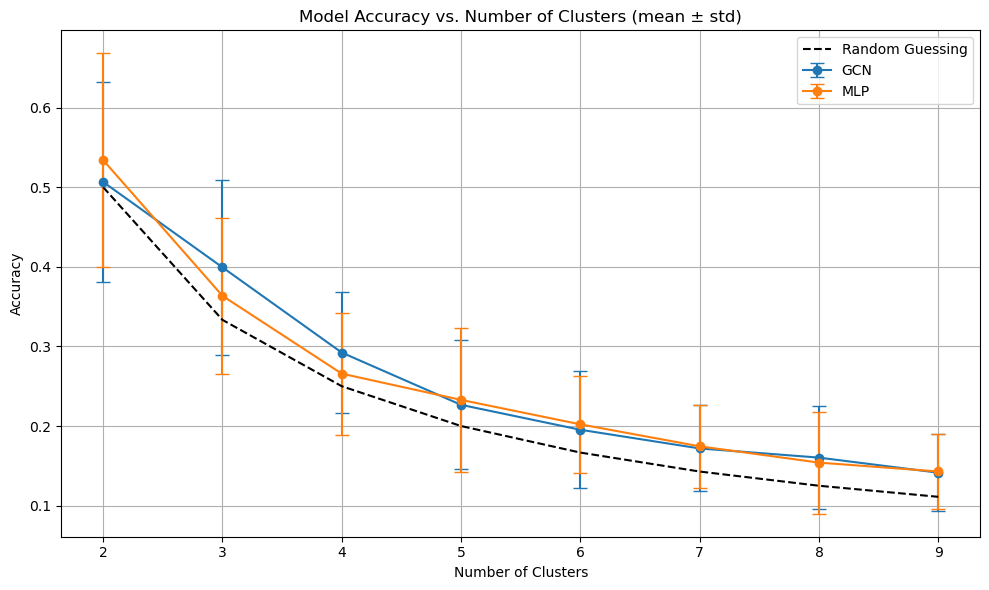

In [5]:
import matplotlib.pyplot as plt

models = ["GCN", "MLP"]

plt.figure(figsize=(10, 6))

for model in models:
    grouped = results_df.groupby('num_clusters')[f'{model}__test_accuracy']
    means = grouped.mean()
    stds = grouped.std()

    plt.errorbar(
        means.index, means.values, yerr=stds.values, fmt='o-', capsize=5, label=model
    )

# Add random guessing baseline
cluster_sizes = sorted(results_df['num_clusters'].unique())
random_guess = [1 / c for c in cluster_sizes]
plt.plot(cluster_sizes, random_guess, 'k--', label='Random Guessing')

plt.xlabel('Number of Clusters')
plt.ylabel('Accuracy')
plt.title('Model Accuracy vs. Number of Clusters (mean ± std)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


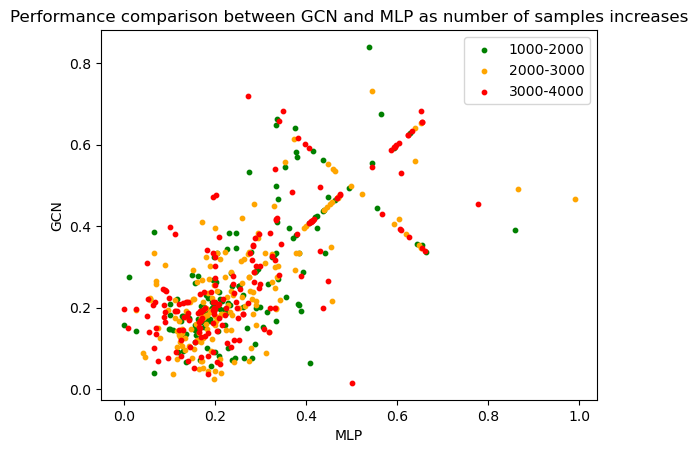

In [8]:
small_mask = results_df['nvertex'] < 2000
mid_mask = (results_df['nvertex'] >= 2000) & (results_df['nvertex'] < 3000)
large_mask = results_df['nvertex'] >= 3000
plt.scatter(results_df['MLP__test_accuracy'][small_mask], results_df['GCN__test_accuracy'][small_mask], s=10, color = 'green', label = '1000-2000')
plt.scatter(results_df['MLP__test_accuracy'][mid_mask], results_df['GCN__test_accuracy'][mid_mask], s=10, color = 'orange', label = '2000-3000')    
plt.scatter(results_df['MLP__test_accuracy'][large_mask], results_df['GCN__test_accuracy'][large_mask], s=10, color = 'red', label = '3000-4000')
plt.legend()
plt.xlabel('MLP')
plt.ylabel('GCN')
plt.title('Performance comparison between GCN and MLP as number of samples increases')
plt.show()

In [16]:
small_mask = results_df['nvertex'] < 2000
mid_mask = (results_df['nvertex'] >= 2000) & (results_df['nvertex'] < 3000)
large_mask = results_df['nvertex'] >= 3000

for mask in [small_mask, mid_mask, large_mask]:
    print(results_df[mask].agg({'GCN__test_accuracy': 'mean', 'MLP__test_accuracy': 'mean'}))
    print(results_df[mask].agg({'GCN__test_accuracy': 'std', 'MLP__test_accuracy': 'std'}))

GCN__test_accuracy    0.266745
MLP__test_accuracy    0.265802
dtype: float64
GCN__test_accuracy    0.153547
MLP__test_accuracy    0.141962
dtype: float64
GCN__test_accuracy    0.250385
MLP__test_accuracy    0.259162
dtype: float64
GCN__test_accuracy    0.139387
MLP__test_accuracy    0.154076
dtype: float64
GCN__test_accuracy    0.281832
MLP__test_accuracy    0.269215
dtype: float64
GCN__test_accuracy    0.161201
MLP__test_accuracy    0.165937
dtype: float64


In [34]:
# Constants
NSHARDS = 10
RESULTS_DIR_random_gs = '../../graph_gen/snellius_gen/random_gs/random_gs'
LOCALDIR = '/tmp'

MODELS = ['GCN', 'MLP']
METRIC = 'accuracy_score'

In [42]:
results_df_random_gs = df_gen(RESULTS_DIR_random_gs, NSHARDS)

results.ndjson-00000-of-00010
results.ndjson-00001-of-00010
results.ndjson-00002-of-00010
results.ndjson-00003-of-00010
results.ndjson-00004-of-00010
results.ndjson-00005-of-00010
results.ndjson-00006-of-00010
results.ndjson-00007-of-00010
results.ndjson-00008-of-00010
results.ndjson-00009-of-00010


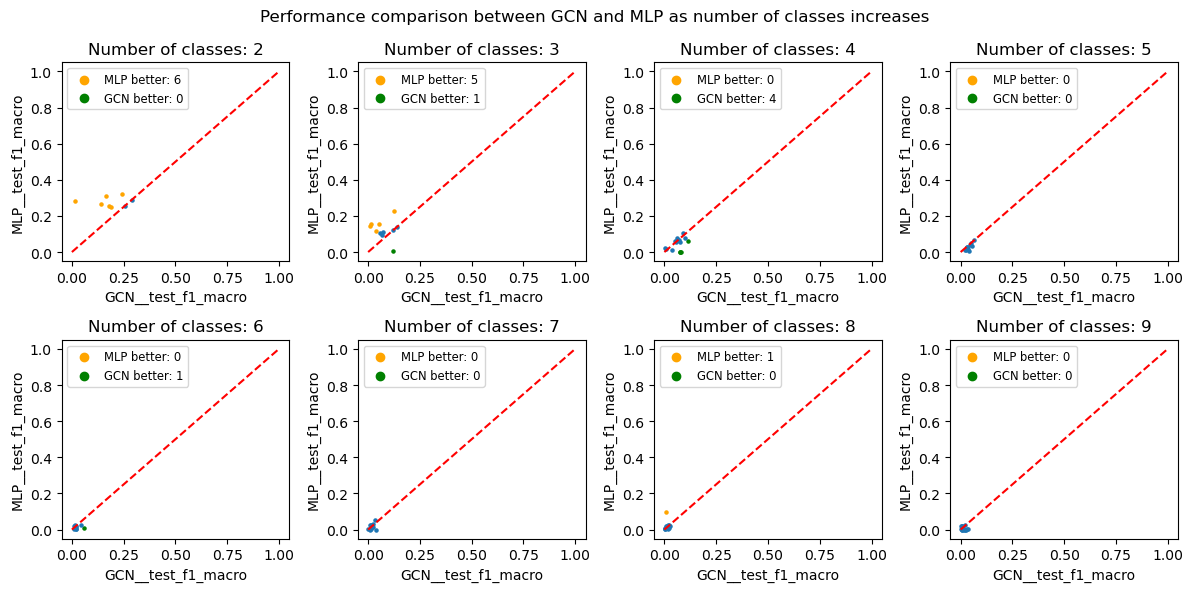

In [44]:
MLP_METRIC = 'MLP__test_f1_macro'
GCN_METRIC = 'GCN__test_f1_macro'
cluster_sizes = results_df_random_gs['num_clusters'].unique()
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.flatten()
for cluster_size in np.sort(cluster_sizes):
    axes_index = cluster_size - cluster_sizes.min()
    results_df_2_clusters = results_df_random_gs[results_df_random_gs['num_clusters'] == cluster_size]
    MLP_better = results_df_2_clusters[MLP_METRIC] > results_df_2_clusters[GCN_METRIC]+.05
    GCN_better = results_df_2_clusters[GCN_METRIC] > results_df_2_clusters[MLP_METRIC]+.05
    total_samples = len(MLP_better)

    ax = axes[axes_index]
    ax.scatter(results_df_2_clusters[GCN_METRIC][MLP_better],
               results_df_2_clusters[MLP_METRIC][MLP_better], color = 'orange', s = 5)
    ax.scatter(results_df_2_clusters[GCN_METRIC][GCN_better],
               results_df_2_clusters[MLP_METRIC][GCN_better], color = 'green', s = 5)
    ax.scatter(results_df_2_clusters[GCN_METRIC][~(MLP_better | GCN_better)],
               results_df_2_clusters[MLP_METRIC][~(MLP_better | GCN_better)], s = 5)
    ax.plot([0, 1], [0, 1], color='red', linestyle='--')
    ax.scatter([], [], label=f"MLP better: {sum(MLP_better)}", color = 'orange')
    ax.scatter([], [], label=f"GCN better: {sum(GCN_better)}", color = 'green')
    ax.set_title(f'Number of classes: {cluster_size}')
    ax.set_xlabel(f'{GCN_METRIC}')
    ax.set_ylabel(f'{MLP_METRIC}')
    ax.legend(fontsize='small')

# Hide unused subplots if cluster_sizes < 8
for i in range(len(cluster_sizes), len(axes)):
    axes[i].axis('off')

plt.suptitle("Performance comparison between GCN and MLP as number of classes increases")
plt.tight_layout()
plt.show()


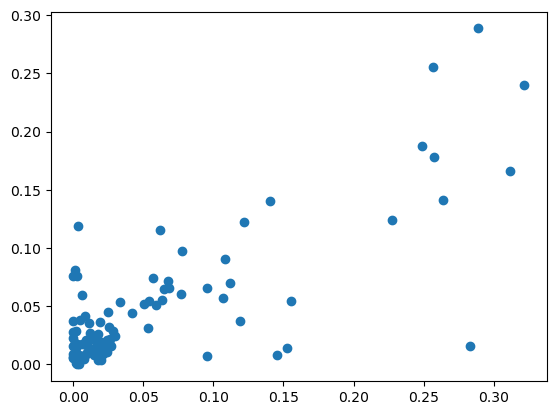

In [49]:
plt.scatter(results_df_random_gs[MLP_METRIC], results_df_random_gs[GCN_METRIC])
plt.show()